# HW 4.1. Autograd
Autograd is a package developed in Python and can compute derivatives of scalar-valued functions. It can also be used to take derivatives recursively. 

To install this package, just type `pip install autograd` in your terminal.

In [1]:
import autograd.numpy as np
from autograd import grad
from YourAnswer import sigmoid, d_sigmoid_without_autograd, d_sigmoid_with_autograd

## 1. Square function
'a is defined by b' is denoted as $a:=b$.
$$
f(x) := x^2\\
d_f(x) := \frac{df(x)}{dx} = 2x
$$

In [2]:
def f(x):
    return x * x

f(3.)

9.0

$$
d_f(3) = 2\times3 = 6
$$

In [3]:
d_f = grad(f)
d_f(3.)

6.0

## 2. Nested Functions
$$
y := f(x) = x^2\\
g(y) := 2y^2\\
g(f(y)) := 2x^4
$$

In [4]:
def g(y):
    z = 2 * y * y
    return z
g(f(2))

32

$$
d_g(x) := \frac{g(f(x))}{dx} = \frac{d}{dx}2x^4 = 8x^3\\
d_g(-2) = 8*(-8) = -64
$$

In [5]:
d_nested_function = grad(lambda y: g(f(y)))
d_nested_function(-2.)

-64.0

## NOTE
Notice that the argument with respect to which we want to compute the derivative is the first argument to the grad() function by default.

## 3. Multiple Arguments

$$
a(x,y) = x+y\\
b(x,y) = x\times a = x(x+y)\\
$$

In [6]:
def a(x,y):
    return x+y
def b(x,y):
    return x*a(x,y)

$$
\frac{d}{dx}b(x,y) = 2x+y
$$

In [7]:
d_b = grad(b, argnum=0) #Note that argnum=0 is default
d_b(2., 1.)

5.0

$$
\frac{d}{dy}b(x,y) = x
$$

In [8]:
d_b = grad(b, argnum=1)
d_b(2., 1.)

2.0

## 4. Derivative of Derivative
$$
\frac{d^2}{dx^2}b(x,y) = 2
$$

In [9]:
# First derivative
d_b = grad(b)    # 1st Derivative

# SECOND DERIVATIVE
d2_b = grad(d_b) # 2nd Derivative

In [10]:
d2_b(9., 10.)

2.0

## 5. Practice: sigmoid function

$$
sigmoid(x) = \frac{1}{1+exp(-x)}\\
d_{sigmoid}(x) = \frac{d}{dx}sigmoid(x)
$$

Instruction: Implement functions that return $d_{sigmoid}(x)$ 
- `d_sigmoid_without_autograd(x)`
    - find a analytic solution
- `d_sigmoid_with_autograd(x)`
    - use `grad` function.

In [11]:
d_sigmoid_without_autograd(1.)

0.19661193324148185

In our system, the result is `0.19661193324148185`

In [12]:
d_sigmoid_with_autograd(1.)

0.19661193324148188

In our system, the result is `0.19661193324148188` (This result and the one above should be almost the same)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x = np.linspace(-7., 7., 200)

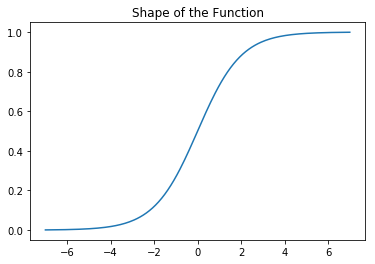

In [15]:
plt.plot(x, sigmoid(x))
plt.title("Shape of the Function")

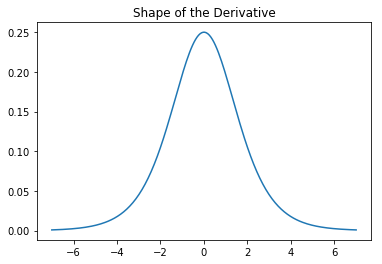

In [16]:
plt.plot(x, [d_sigmoid_with_autograd(i) for i in x])
plt.title('Shape of the Derivative')

## More Information
If you are curious to learn more about the package and its working, you can visit https://github.com/HIPS/autograd/blob/master/docs/tutorial.md for more information!